In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [5]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 74.0/74.0 MB 18.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 70.9/70.9 MB 16.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
df=pd.read_csv('StudentsPerformance.csv')

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("categories in 'gender' variable :  ",end="")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable: ",end="")
print(df['race/ethnicity'].unique())

print("categories in 'parental level of education' variable :  ",end="")
print(df['parental level of education'].unique())

print("categories in 'lunch' variable: ",end="")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable: ",end="")
print(df['test preparation course'].unique())

categories in 'gender' variable :  ['female' 'male']
categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable: ['standard' 'free/reduced']
categories in 'test preparation course' variable: ['none' 'completed']


In [12]:
y=df['math score']

In [13]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [14]:
x=df.drop(columns=['math score'])

In [15]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [16]:
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

transformation=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('numeric_transformer',numeric_transformer,num_features)
    ]


)

In [17]:
x=transformation.fit_transform(x)

In [18]:
x.shape()

TypeError: 'tuple' object is not callable

In [19]:
x.shape


(1000, 19)

In [21]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [31]:
## create evaluation function to give all the metrics

def evaluate_model(actual,predicted):
    mae=mean_absolute_error(actual,predicted)
    mse=mean_squared_error
    rmse=np.sqrt(mean_squared_error(actual,predicted))
    r2=r2_score(actual,predicted)
    return mae,rmse,r2
    

In [32]:
models={
    "linear reg":LinearRegression(),
    "lasso":Lasso(),
    'ridge':Ridge(),
    'k-neighbors':KNeighborsRegressor(),
    'decision tree':DecisionTreeRegressor(),
    'random_forest':RandomForestRegressor(),
    'XGboost reg':XGBRegressor(),
    'Catboost reg':CatBoostRegressor(),
    'adaboost regressor':AdaBoostRegressor()
}

models_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    
    #make pred
    y_train_pred=(model.predict(x_train))
    y_test_pred=(model.predict(x_test))
    
    #evaluation metrics result
    model_train_mae,model_test_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
    
    models_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)
    

Learning rate set to 0.039525
0:	learn: 14.5987177	total: 131ms	remaining: 2m 11s
1:	learn: 14.2251886	total: 135ms	remaining: 1m 7s
2:	learn: 13.8866124	total: 140ms	remaining: 46.5s
3:	learn: 13.5235688	total: 144ms	remaining: 35.8s
4:	learn: 13.1887021	total: 148ms	remaining: 29.4s
5:	learn: 12.9124226	total: 152ms	remaining: 25.1s
6:	learn: 12.6000335	total: 156ms	remaining: 22.1s
7:	learn: 12.3299057	total: 161ms	remaining: 20s
8:	learn: 12.0660619	total: 167ms	remaining: 18.4s
9:	learn: 11.7730981	total: 171ms	remaining: 16.9s
10:	learn: 11.4922764	total: 175ms	remaining: 15.7s
11:	learn: 11.2626483	total: 179ms	remaining: 14.7s
12:	learn: 11.0426039	total: 184ms	remaining: 14s
13:	learn: 10.7991693	total: 189ms	remaining: 13.3s
14:	learn: 10.5541002	total: 193ms	remaining: 12.7s
15:	learn: 10.3191811	total: 196ms	remaining: 12.1s
16:	learn: 10.1000444	total: 201ms	remaining: 11.6s
17:	learn: 9.8945567	total: 205ms	remaining: 11.2s
18:	learn: 9.6901741	total: 208ms	remaining: 10.

187:	learn: 4.8386237	total: 541ms	remaining: 2.34s
188:	learn: 4.8346022	total: 543ms	remaining: 2.33s
189:	learn: 4.8308590	total: 545ms	remaining: 2.32s
190:	learn: 4.8275905	total: 546ms	remaining: 2.31s
191:	learn: 4.8222462	total: 548ms	remaining: 2.31s
192:	learn: 4.8166864	total: 549ms	remaining: 2.29s
193:	learn: 4.8147971	total: 550ms	remaining: 2.29s
194:	learn: 4.8116394	total: 552ms	remaining: 2.28s
195:	learn: 4.8048134	total: 553ms	remaining: 2.27s
196:	learn: 4.8025161	total: 554ms	remaining: 2.26s
197:	learn: 4.8000879	total: 555ms	remaining: 2.25s
198:	learn: 4.7947731	total: 556ms	remaining: 2.24s
199:	learn: 4.7916648	total: 558ms	remaining: 2.23s
200:	learn: 4.7859899	total: 559ms	remaining: 2.22s
201:	learn: 4.7823871	total: 560ms	remaining: 2.21s
202:	learn: 4.7786237	total: 561ms	remaining: 2.2s
203:	learn: 4.7757722	total: 562ms	remaining: 2.19s
204:	learn: 4.7702310	total: 563ms	remaining: 2.18s
205:	learn: 4.7644967	total: 564ms	remaining: 2.17s
206:	learn: 4

422:	learn: 4.1033901	total: 902ms	remaining: 1.23s
423:	learn: 4.0967244	total: 904ms	remaining: 1.23s
424:	learn: 4.0934313	total: 905ms	remaining: 1.22s
425:	learn: 4.0914127	total: 906ms	remaining: 1.22s
426:	learn: 4.0911929	total: 908ms	remaining: 1.22s
427:	learn: 4.0889946	total: 910ms	remaining: 1.22s
428:	learn: 4.0878454	total: 912ms	remaining: 1.21s
429:	learn: 4.0836503	total: 914ms	remaining: 1.21s
430:	learn: 4.0798407	total: 915ms	remaining: 1.21s
431:	learn: 4.0757078	total: 917ms	remaining: 1.21s
432:	learn: 4.0713454	total: 918ms	remaining: 1.2s
433:	learn: 4.0674605	total: 919ms	remaining: 1.2s
434:	learn: 4.0649147	total: 921ms	remaining: 1.2s
435:	learn: 4.0638232	total: 922ms	remaining: 1.19s
436:	learn: 4.0588985	total: 923ms	remaining: 1.19s
437:	learn: 4.0541204	total: 925ms	remaining: 1.19s
438:	learn: 4.0527159	total: 926ms	remaining: 1.18s
439:	learn: 4.0521142	total: 927ms	remaining: 1.18s
440:	learn: 4.0513773	total: 928ms	remaining: 1.18s
441:	learn: 4.0

646:	learn: 3.6347546	total: 1.27s	remaining: 695ms
647:	learn: 3.6307250	total: 1.28s	remaining: 693ms
648:	learn: 3.6294083	total: 1.28s	remaining: 691ms
649:	learn: 3.6279065	total: 1.28s	remaining: 689ms
650:	learn: 3.6273890	total: 1.28s	remaining: 687ms
651:	learn: 3.6251636	total: 1.28s	remaining: 686ms
652:	learn: 3.6237020	total: 1.29s	remaining: 684ms
653:	learn: 3.6223426	total: 1.29s	remaining: 682ms
654:	learn: 3.6211306	total: 1.29s	remaining: 680ms
655:	learn: 3.6191257	total: 1.29s	remaining: 678ms
656:	learn: 3.6188788	total: 1.29s	remaining: 676ms
657:	learn: 3.6162074	total: 1.3s	remaining: 674ms
658:	learn: 3.6120649	total: 1.3s	remaining: 672ms
659:	learn: 3.6119559	total: 1.3s	remaining: 670ms
660:	learn: 3.6107137	total: 1.3s	remaining: 668ms
661:	learn: 3.6100440	total: 1.3s	remaining: 666ms
662:	learn: 3.6073427	total: 1.3s	remaining: 664ms
663:	learn: 3.6025106	total: 1.31s	remaining: 662ms
664:	learn: 3.6004924	total: 1.31s	remaining: 659ms
665:	learn: 3.5971

894:	learn: 3.2004851	total: 1.64s	remaining: 193ms
895:	learn: 3.1974676	total: 1.64s	remaining: 191ms
896:	learn: 3.1958385	total: 1.65s	remaining: 189ms
897:	learn: 3.1956717	total: 1.65s	remaining: 187ms
898:	learn: 3.1942131	total: 1.65s	remaining: 185ms
899:	learn: 3.1928847	total: 1.65s	remaining: 183ms
900:	learn: 3.1883642	total: 1.65s	remaining: 181ms
901:	learn: 3.1852195	total: 1.65s	remaining: 180ms
902:	learn: 3.1841204	total: 1.66s	remaining: 178ms
903:	learn: 3.1837253	total: 1.66s	remaining: 176ms
904:	learn: 3.1812646	total: 1.66s	remaining: 174ms
905:	learn: 3.1807416	total: 1.66s	remaining: 172ms
906:	learn: 3.1797826	total: 1.66s	remaining: 170ms
907:	learn: 3.1763776	total: 1.66s	remaining: 169ms
908:	learn: 3.1740782	total: 1.67s	remaining: 167ms
909:	learn: 3.1712424	total: 1.67s	remaining: 165ms
910:	learn: 3.1704210	total: 1.67s	remaining: 163ms
911:	learn: 3.1700872	total: 1.67s	remaining: 161ms
912:	learn: 3.1673031	total: 1.67s	remaining: 159ms
913:	learn: 

In [33]:
models_list

['linear reg',
 'lasso',
 'ridge',
 'k-neighbors',
 'decision tree',
 'random_forest',
 'XGboost reg',
 'Catboost reg',
 'adaboost regressor']

In [34]:
r2_list

[0.8804332983749563,
 0.8253197323627852,
 0.8805931485028737,
 0.7831932814549615,
 0.7394780273068287,
 0.8514072311902561,
 0.8215894515233413,
 0.8516318920747058,
 0.8485279977489439]

In [37]:
table= pd.DataFrame(list(zip(models_list,r2_list)),columns=['model','r2 score'])

In [38]:
table

,model,r2 score
0,linear reg,0.880433
1,lasso,0.825320
2,ridge,0.880593
3,k-neighbors,0.783193
4,decision tree,0.739478
5,random_forest,0.851407
6,XGboost reg,0.821589
7,Catboost reg,0.851632
8,adaboost regressor,0.848528


In [42]:
##linear reg has max efficiency, hence we ll use lr for prediction
lin_model=LinearRegression(fit_intercept=True)
lin_predictor=lin_model.fit(x_train,y_train)
y_predict=lin_predictor.predict(x_test)
score=r2_score(y_test,y_predict)*100
print('accuracy of the model is  %2f' %score )

accuracy of the model is  88.043330


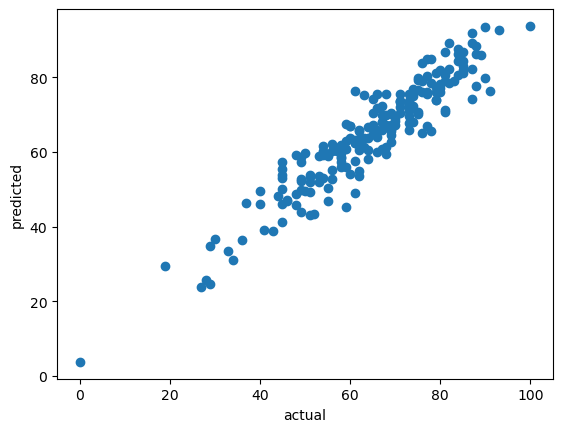

In [45]:
plt.scatter(y_test,y_predict);
plt.xlabel('actual');
plt.ylabel('predicted');

<AxesSubplot:xlabel='math score'>

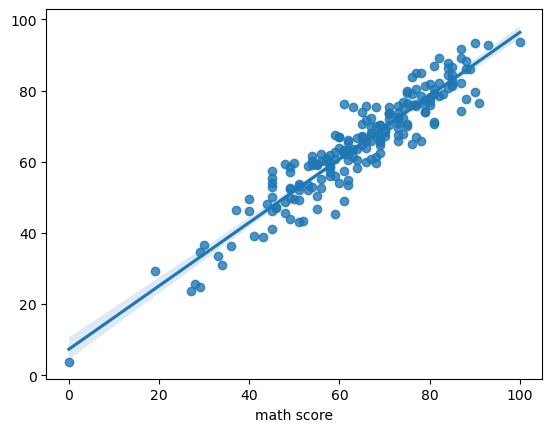

In [47]:
sns.regplot(x=y_test,y=y_predict)